In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize

%matplotlib inline

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [42]:
def xlogx(x):
    if isinstance(x, float):
        if x == 0:
            return 0
        elif x > 0:
            return x * np.log(x)
        else:
            return np.inf
    
    elif isinstance(x, np.ndarray):
        return np.array(
            [s * np.log(s) if s > 0 else 0 if s == 0 else np.inf for s in x]
        )
    
    elif isinstance(x, list):
        return np.array(
            [s * np.log(s) if s > 0 else 0 if s == 0 else np.inf for s in x]
        )
    
    else:
        return ValueError, 'incompatible type, must be either: float, numpy.ndarray, or list'

# Free energy per lattice site for Flory-Huggins binary polymer solution

$\dfrac{\Delta F} {n_{0}k_{B}T} = \dfrac{\phi}{N} \ln \phi + (1 - \phi) \ln (1 - \phi) + \chi \phi (1 - \phi)$

where $n_{0}$ is the number of lattice sites, $k_{B}$ is the Boltzmann constant, $T$ is absolute temperature, $\phi$ is the volume fraction of the polymer, $N$ is the degree of polymerization of the polymer, and $\chi$ is the Flory-Huggins interaction parameter between the polymer and solvent. The polymer and solvent segments are assumed to be arranged randomly on a lattice and assuming only nearest-neighbors interactions.

### Flory-Huggins interaction parameter
$\chi = \dfrac{z}{k_{B}T}\left[u_{ps} - \dfrac{1}{2}(u_{pp} - u_{s})\right]$

$u_{ps}$, $u_{pp}$, and $u_{ss}$ are the pairwise, nearest-neighbor interaction energies for polymer-solvent, polymer-polymer, and solvent-solvent segments pairs. If the polymer and solvent prefer to interact with each other, then $\chi < 0$, otherwise $\chi > 0$. If $\chi = 0$, there is no preference between any of the interactions.

In [40]:
def f_FH(phi, *args):
    """Free energy per lattice site for binary polymer solution from Flory-Huggins theory."""
    chi, N = args
    return xlogx(phi) / N + xlogx(1 - phi) + chi * phi * (1 - phi)

In [4]:
def mu_solvent(phi, *args):
    """
    Chemical potential of the solvent as a function of polymer volume fraction from Flory-Huggins theory. 
    The negative is known as the osmotic pressure of the solution.
    """
    chi, N = args
    return np.log(1 - phi) + ((1 - (1 / N)) * phi) + chi * (phi ** 2)

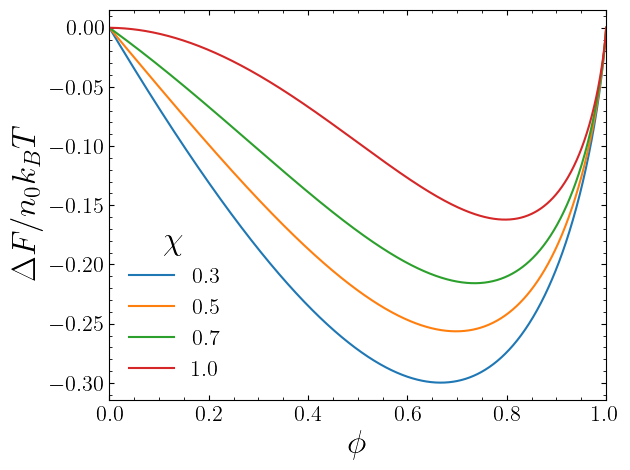

In [5]:
N = 1000  # chain length
chi = np.array([0.3, 0.5, 0.7, 1])
phi = np.linspace(0, 1, 1000)

fig, ax = plt.subplots()

for c in chi:
    f = f_FH(phi, c, N)
    ax.plot(phi, f, label=f'${c}$')

ax.set_xlim(0, 1)
ax.set_xlabel('$\phi$', fontsize=24)
ax.set_ylabel(r'$\Delta F/n_{0}k_{B}T$', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.legend(fontsize=16, framealpha=0, title='$\chi$', title_fontsize=24)

fig.tight_layout()

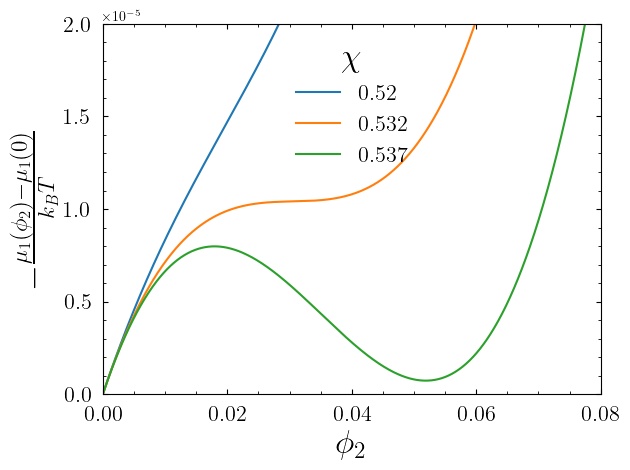

In [6]:
N = 1000
chi = np.array([0.52, 0.532, 0.537])
phi = np.linspace(0, 0.08, 1000)

fig, ax = plt.subplots()

for c in chi:
    ax.plot(phi, -mu_solvent(phi, c, N), ls='solid', label=f'${c}$')

ax.set_xlim(0, 0.08)
ax.set_ylim(0, 2e-5)
ax.set_xlabel('$\phi$', fontsize=24)
ax.set_ylabel(r'$-\frac{\mu_{1}(\phi)-\mu_{1}(0)}{k_{B}T}$', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=16, pad=8)
ax.legend(fontsize=16, framealpha=0, title='$\chi$', title_fontsize=24)

fig.tight_layout()

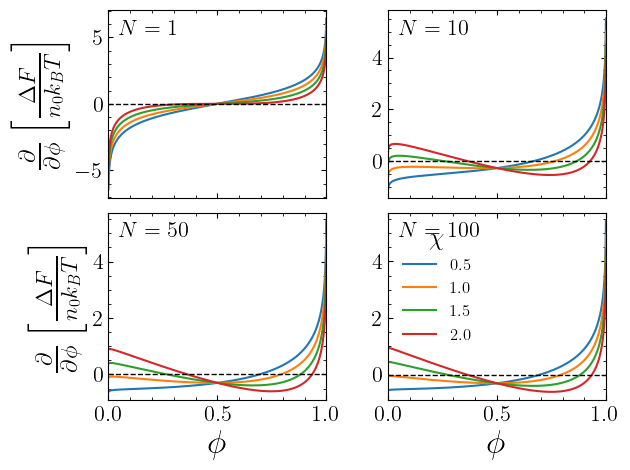

In [25]:
N = [1, 5, 10, 100]
chi = np.arange(0.5, 2.5, 0.5)
phi = np.linspace(0.001, 0.999, 999)

fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True)
ax = ax.flatten()

for i, a in enumerate(ax):
    a.annotate(f'$N = {N[i]}$', xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', fontsize=16)
    for c in chi:
        dfdphi = ((np.log(phi) + 1) / N[i]) - np.log(1 - phi) + c * (1 - 2 * phi) - 1
        a.plot(phi, dfdphi, label=f'${c}$')

    a.axhline(color='black', linestyle='dashed', linewidth=1)
    if i > 1:
        a.set_xlabel('$\phi$', fontsize=24)
    if i in [0, 2]:
        a.set_ylabel(r'$\frac{\partial}{\partial \phi} \left[\frac{\Delta F} {n_{0}k_{B}T}\right]$', fontsize=24)
    a.set_xlim(0, 1)
    a.tick_params(axis='both', which='major', labelsize=16)
    
    if i == 3:
        a.legend(fontsize=12, framealpha=0, title='$\chi$', title_fontsize=18)
fig.tight_layout()

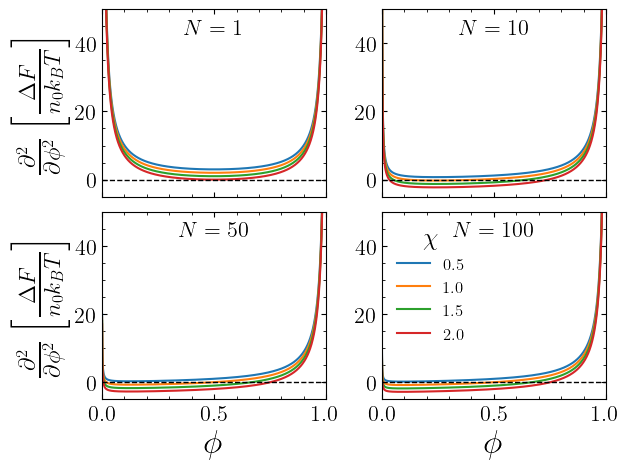

In [24]:
N = [1, 5, 10, 100]
chi = np.arange(0.5, 2.5, 0.5)
phi = np.linspace(0.001, 0.999, 999)

fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True)
ax = ax.flatten()

for i, a in enumerate(ax):
    a.annotate(f'$N = {N[i]}$', xy=(0.5, 0.95), xycoords='axes fraction', ha='center', va='top', fontsize=16)
    for c in chi:
        d2fdphi2 = (1 / (1 - phi)) + (1 / (N[i] * phi)) - (2 * c)
        a.plot(phi, d2fdphi2, label=f'${c}$')

    a.axhline(color='black', linestyle='dashed', linewidth=1)
    if i > 1:
        a.set_xlabel('$\phi$', fontsize=24)
    if i in [0, 2]:
        a.set_ylabel(r'$\frac{\partial^{2}}{\partial \phi^{2}} \left[\frac{\Delta F} {n_{0}k_{B}T}\right]$', fontsize=24)
    a.tick_params(axis='both', which='major', labelsize=16)
    a.set_xlim(0, 1)
    a.set_ylim(-5, 50)
    
    if i == 3:
        a.legend(fontsize=12, framealpha=0, title='$\chi$', title_fontsize=18)
fig.tight_layout()

If the second derivative is negative, the solution is unstable at that composition and $\chi$ value and thus the mixture will spontaneously phase separate.

In [38]:
def objective(s, phi, *args):
    phi_a, xa = s
    phi_b = (phi - (xa * phi_a)) / (1 - xa)

    if np.abs(phi_b - 0.5) < 0.5 and np.abs(xa - 0.5) < 0.499:
        return (xa * f_FH(phi_a, *args)) + ((1 - xa) * f_FH(phi_b, *args))
    else:
        return np.inf

In [64]:
def phase_2d(N, chis, phis, bnd_pad=0):
    """
    Compute 2d phase diagram from 2d free energy minimization. 

    Args:
        N (int): polymer chain length
        chis (list-like): Flory-Huggins chi parameters
        phis (list-like): polymer volume fractions
        bnd_pad (float): padding for solution

    Returns:
        data (numpy.ndarray): 2d array of solutions: chi, polymer-poor phase volume fraction, polymer-rich volume fraction, free energy minimum
    """
    data = np.zeros((len(chis), 4))

    bnds = (
        (0 + bnd_pad, 1 - bnd_pad),
        (0 + bnd_pad, 1 - bnd_pad),
    )
    for i, c in enumerate(chis):
        fmin = np.inf
        pa, pb = 0, 0
        for p in phis:
            results = minimize(
                objective, x0=[p, 0.5], args=(p, c, N), 
                method='Nelder-Mead', options={'fatol': 1e-12, 'xatol': 1e-12},
                bounds=bnds
            )
            if results.success:
                phi_a, xa = results.x
                phi_b = (p - (xa * phi_a)) / (1 - xa)
                ftotal = (xa * f_FH(phi_a, *(c, N))) + ((1 - xa) * f_FH(phi_b, *(c, N)))
                if ftotal < fmin:
                    if np.abs(phi_a - phi_b) > 1e-3:
                        if phi_a > phi_b:
                            pb, pa = phi_a, phi_b
                        else:
                            pa, pb = phi_a, phi_b
                        fmin = ftotal

        if np.array([pa, pb, fmin]).all():
            data[i, :] = [c, pa, pb, fmin]

    return data[data.any(axis=1)]

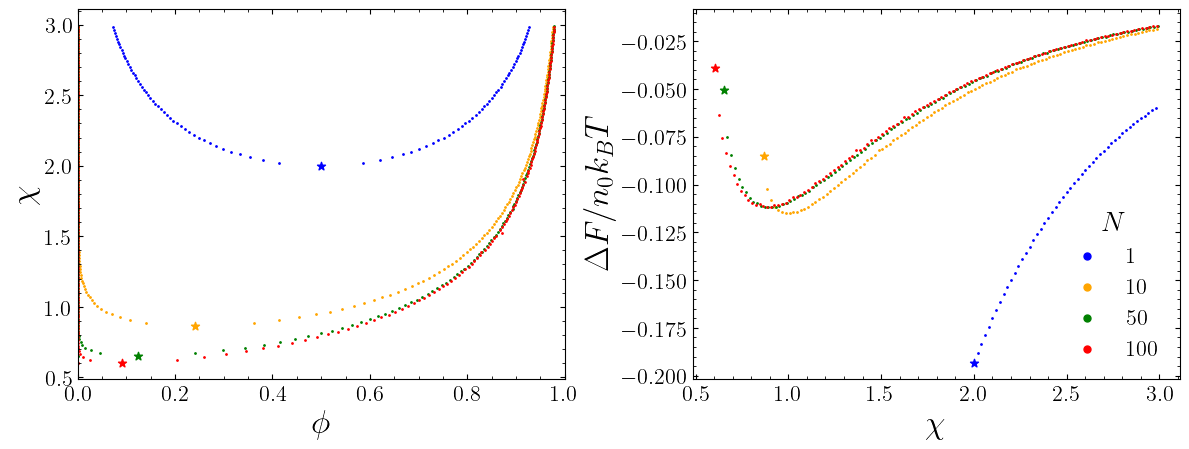

In [23]:
colors = ['blue', 'orange', 'green', 'red']
fig, ax = plt.subplots(figsize=(12, 4.6), ncols=2)

for i, N in enumerate([1, 5, 10, 100]):
    phi_c = 1 / (1 + np.sqrt(N))
    chi_c = 0.5 * (1 + 1 / np.sqrt(N)) ** 2

    CHIS = np.arange(chi_c, 3, 0.02)
    PHIS = np.arange(0.001, 1, 0.001)
    data = phase_2d(N, CHIS, PHIS, bnd_pad=0.001)

    ax[0].scatter(data[:, 1], data[:, 0], s=1, color=f'{colors[i]}')
    ax[0].scatter(data[:, 2], data[:, 0], s=1, color=f'{colors[i]}')
    ax[0].scatter(phi_c, chi_c, color=f'{colors[i]}', marker='*')
    ax[1].scatter(data[:, 0], data[:, -1], s=1, color=f'{colors[i]}', label=f'${N}$')
    ax[1].scatter(chi_c, f_FH(phi_c, *(chi_c, N)), color=f'{colors[i]}', marker='*')

ax[0].set_xlabel('$\phi$', fontsize=24)
ax[0].set_ylabel('$\chi$', fontsize=24)
ax[0].tick_params(axis='both', which='major', labelsize=16)
ax[0].set_xlim(0, 1)

ax[1].set_xlabel('$\chi$', fontsize=24)
ax[1].set_ylabel('$\Delta F/n_{0}k_{B}T$', fontsize=24)
ax[1].tick_params(axis='both', which='major', labelsize=16)
ax[1].legend(fontsize=16, title='$N$', title_fontsize=20, framealpha=0, markerscale=5)

fig.tight_layout()

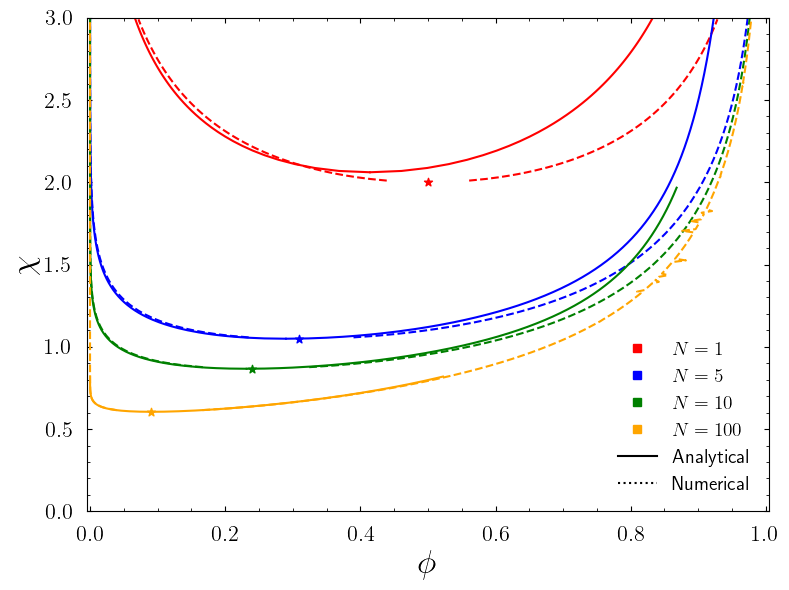

In [71]:
N = np.array([1, 5, 10, 100])[:, np.newaxis]
gamma = np.arange(1.001, 100000, 0.25)[np.newaxis, :]

h = (12 / N) * (0.5 * (gamma + 1) * np.log(gamma) - (gamma - 1))
phi = (-h * (gamma + 1) + np.sqrt((((gamma + 1) ** 2) * (h ** 2)) + (4 * ((gamma - 1) ** 3) * h))) / (2 * (gamma - 1) ** 3)
chi = ((gamma - 1) * (1 - (1 / N)) + np.log(gamma) / (phi * N)) / (2 * (gamma - 1) - phi * ((gamma ** 2) - 1))
phi_prime = gamma * phi
phi_c = 1 / (1 + np.sqrt(N))
chi_c = 0.5 * (1 + (1 / np.sqrt(N))) ** 2

xmin, xmax = -0.01, 1.01
ymin, ymax = 0, 3

colors = ['red', 'blue', 'green', 'orange']
linestyles = ['solid', 'dotted']
fig, ax = plt.subplots(figsize=(8, 6))

for i, (p_row, pp_row, c_row) in enumerate(zip(phi, phi_prime, chi)):
    # approx. analytical solution
    ax.plot(p_row[c_row <= ymax], c_row[c_row <= ymax], c=colors[i])
    ax.plot(pp_row[c_row <= ymax], c_row[c_row <= ymax], c=colors[i])

    # # numerical solutions
    CHIS = np.arange(chi_c[i], 3, 0.01)
    PHIS = np.arange(0.001, 1, 0.01)
    data = phase_2d(N.squeeze()[i], CHIS, PHIS, bnd_pad=0.001)
    ax.plot(data[:, 1], data[:, 0], color=colors[i], ls='dashed')
    ax.plot(data[:, 2], data[:, 0], color=colors[i], ls='dashed')

    # critical points according to F-H theory
    ax.scatter(phi_c[i], chi_c[i], marker='*', c=colors[i])

ax.set_xlabel('$\phi$', fontsize=24)
ax.set_ylabel('$\chi$', fontsize=24)
ax.set_xlim(-0.005, 1.005)
ax.set_ylim(0, ymax)
ax.tick_params(axis='both', which='major', labelsize=16, pad=10)

f = lambda m, ls, c: plt.plot([],[], marker=m, color=c, linestyle=ls)[0]
handles = [f('s', 'none', colors[i]) for i in range(4)]
handles += [f(' ', linestyles[i], 'black') for i in range(2)]
labels = [f'$N={x}$' for x in [1, 5, 10, 100]] + ['Analytical', 'Numerical']
ax.legend(handles, labels, loc='lower right', fontsize=14, framealpha=0)

fig.tight_layout()
# fig.savefig('analytical-vs-numerical-solutions.png', dpi=600)


Deviations at higher $\phi$ is likely due to the double Taylor series approximation used to obtain the analytical expressions.